#  Gradient Descent Algorithm

Gradient descent is an iterative optimization algorithm to find the minimum value (local optima) of a function. Gradient descent is efficient with both linear and classification problems and provides required accuracy with multiple parameters (Weights and bias). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = [0,0.12,0.25,0.27,0.38,0.42,0.44,0.55,0.92,1.0]
Y = [0,0.15,0.54,0.51,0.1,0.19,0.53, 0.34,1.0,0.58]

In [3]:
def f(w,b,x):
    #print(1/(1+np.exp(-(w*x+b))))
    return 1/(1+np.exp(-(w*x+b)))

def error(w,b):
    err = 0.0
    for x,y in zip(X,Y):
        fx   = f(w,b,x)
        err += (fx-y)**2/2
    return err

def grad_b(w,b,x,y):
    #print(w,b,x,y)
    fx = f(w,b,x)
    return (fx-y)*fx*(1-fx)

def grad_w(w,b,x,y):
    fx = f(w,b,x)
    return (fx-y)*fx*(1-fx)*x

In [28]:
def gradient_descent():
    w,b,eta,max_epochs = -2,2,0.1,1000
    err = []
    for i in range(max_epochs):
        dw,db =0,0
        for x,y in zip(X,Y):
            dw +=grad_w(w,b,x,y)
            db +=grad_b(w,b,x,y)
        w = w - eta * dw
        b = b - eta * db
        err.append(error(w,b))
        #print(w,b)
    return w,b,err

In [29]:
w,b,err = gradient_descent()

In [30]:
import numpy as np
y = np.arange(0,1,0.01)
x = np.arange(-3,3,0.01)
fn = []
for i in range(len(x)):
    fn.append(1/(1+np.exp(-(w*x[i]+b))))

No handles with labels found to put in legend.


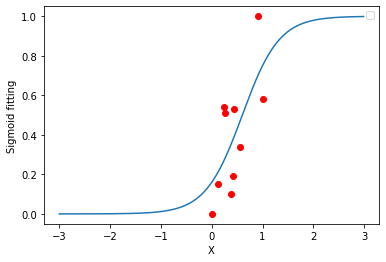

In [31]:
plt.plot(X,Y,'ro')
plt.plot(x,fn)
plt.ylabel("Sigmoid fitting")
plt.xlabel("X") 
leg = plt.legend()

Text(0.5, 0, 'epochs')

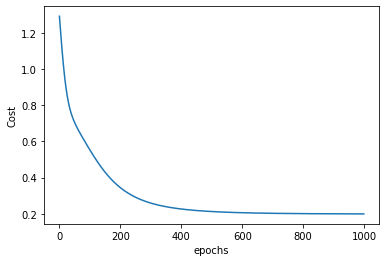

In [32]:
plt.plot(err)
plt.ylabel("Cost") 
plt.xlabel("epochs") 

#  Momentum based Gradient Descent 

Momentum takes past gradients into account to smooth out the steps of gradient descent. 

In [38]:
def momentum_GD():
    err = []
    w,b,eta,max_epochs = -2,2,1.0,1000
    prev_v_w,prev_v_b,gamma = 0,0,0.9
    for i in range(max_epochs):
        dw,db=0,0
        for x,y in zip(X,Y):
            dw +=grad_w(w,b,x,y)
            db +=grad_b(w,b,x,y)
        v_w = gamma*prev_v_w + eta*dw
        v_b = gamma*prev_v_b + eta*db
        w = w - v_w
        b = b - v_b
        prev_v_w = v_w
        prev_v_b = v_b
        err.append(error(w,b))
    return w,b,err

In [39]:
w_mgd,b_mgd,err_mgd = momentum_GD()

In [40]:
y = np.arange(0,1,0.01)
x = np.arange(-3,3,0.01)
fn = []
for i in range(len(x)):
    fn.append(1/(1+np.exp(-(w_mgd*x[i]+b_mgd))))

No handles with labels found to put in legend.


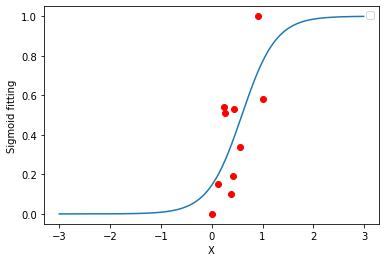

In [41]:
plt.plot(X,Y,'ro')
plt.plot(x,fn)
plt.ylabel("Sigmoid fitting")
plt.xlabel("X") 
leg = plt.legend()

Text(0.5, 0, 'epochs')

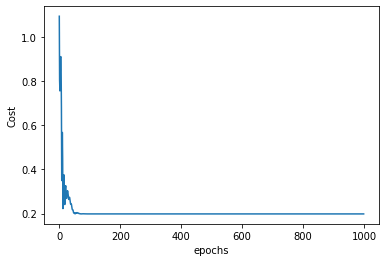

In [43]:
plt.plot(err_mgd)
plt.ylabel("Cost") 
plt.xlabel("epochs") 

#  Nesterov Accelerated Gradient Descent 



In [78]:
def nesterov_accelerated_gradient_descent():
    w, b, eta,max_epochs = -2, 2, 1.0,1000
    prev_v_w, prev_v_b, gamma = 0, 0, 0.9
    err = []
    for i in range(max_epochs):
        dw, db = 0, 0
        # do partial update
        v_w = gamma * prev_v_w
        v_b = gamma * prev_v_b 
        for x,y in zip(X,Y):
          # calculate gradients after partial update
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        # now do the full update    
        v_w = gamma * prev_v_w + eta*dw
        v_b = gamma * prev_v_b + eta*db
        w = w - v_w
        b = b - v_b
        prev_v_w = v_w
        prev_v_b = v_b
        err.append(error(w,b))
    return w,b,err

In [79]:
w_ngd,b_ngd,err_ngd = nesterov_accelerated_gradient_descent()

In [55]:
y = np.arange(0,1,0.01)
x = np.arange(-3,3,0.01)
fn = []
for i in range(len(x)):
    fn.append(1/(1+np.exp(-(w_ngd*x[i]+b_ngd))))

No handles with labels found to put in legend.


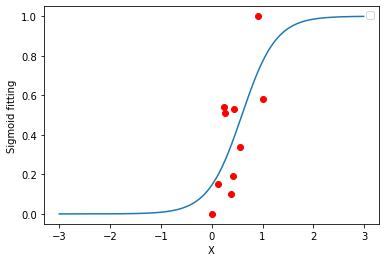

In [56]:
plt.plot(X,Y,'ro')
plt.plot(x,fn)
plt.ylabel("Sigmoid fitting")
plt.xlabel("X") 
leg = plt.legend()

Text(0.5, 0, 'epochs')

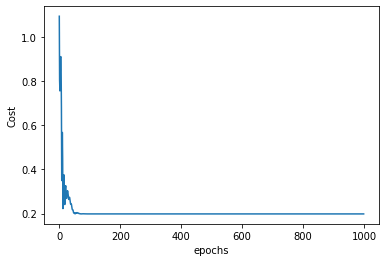

In [57]:
plt.plot(err_ngd)
plt.ylabel("Cost") 
plt.xlabel("epochs") 

# Stochastic Gradient Descent

In [86]:
def stochastic_gradient_descent():
    w,b,eta,max_epochs = -2,2,0.1,1000
    err = []
    for i in range(max_epochs):
        dw,db =0,0
        for x,y in zip(X,Y):
            dw = grad_w(w,b,x,y)
            db = grad_b(w,b,x,y)
            w = w - eta * dw
            b = b - eta * db
        err.append(error(w,b))
        #print(w,b)
    return w,b,err

In [87]:
w_sgd,b_sgd,err_sgd = stochastic_gradient_descent()

No handles with labels found to put in legend.


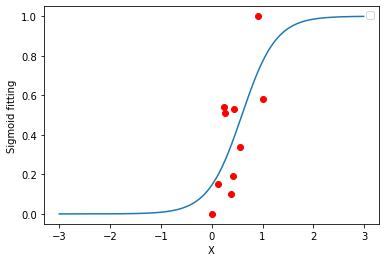

In [88]:
y = np.arange(0,1,0.01)
x = np.arange(-3,3,0.01)
fn = []
for i in range(len(x)):
    fn.append(1/(1+np.exp(-(w_mgd*x[i]+b_mgd))))
plt.plot(X,Y,'ro')
plt.plot(x,fn)
plt.ylabel("Sigmoid fitting")
plt.xlabel("X") 
leg = plt.legend()

Text(0.5, 0, 'epochs')

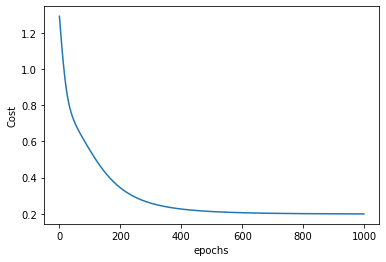

In [89]:
plt.plot(err_sgd)
plt.ylabel("Cost") 
plt.xlabel("epochs") 

# Mini Batch Gradient Descent

In [106]:
def mini_batch_gradient_descent():
    w, b, eta,max_epochs = -2,2, 1.0,1000
    mini_batch_size, num_points_seen = 20, 0
    err = []
    for i in range(max_epochs):
        dw, db = 0, 0
        for x,y in zip(X,Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
            num_points_seen += 1
            
            if num_points_seen % mini_batch_size == 0:
              # seen one mini-batch
                w = w - eta * dw
                b = b - eta * db
              # reset gradients
                dw, db = 0, 0
            err.append(error(w,b))
    return w,b,err

In [107]:
w_msgd,b_msgd,err_msgd = mini_batch_gradient_descent()

No handles with labels found to put in legend.


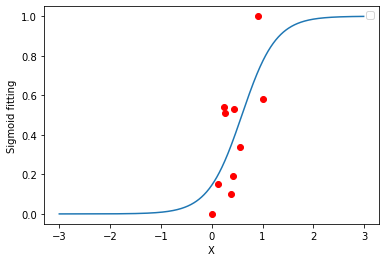

In [108]:
y = np.arange(0,1,0.01)
x = np.arange(-3,3,0.01)
fn = []
for i in range(len(x)):
    fn.append(1/(1+np.exp(-(w_msgd*x[i]+b_msgd))))
plt.plot(X,Y,'ro')
plt.plot(x,fn)
plt.ylabel("Sigmoid fitting")
plt.xlabel("X") 
leg = plt.legend()

Text(0.5, 0, 'epochs')

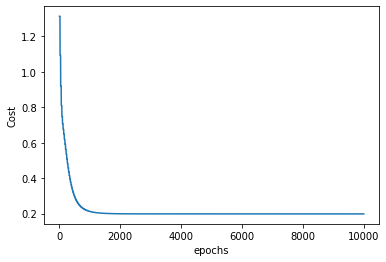

In [109]:
plt.plot(err_msgd)
plt.ylabel("Cost") 
plt.xlabel("epochs") 

# Line search Gradient Descent

In [115]:
def line_search_gradient_descent():
    w,b,max_epochs,etas = -2,2,1000,[0.1,0.5,1.0,5.0,10.0]
    err = []
    for i in range(max_epochs):
        dw, db = 0, 0
        for x,y in zip(X,Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        min_error = 1000
        best_w,best_b = w,b
        for eta in etas:
            tmp_w = w - eta*dw
            tmp_b = b - eta*db
            if error(tmp_w,tmp_b)<min_error:
                best_w = tmp_w
                best_b = tmp_b
                min_error = error(best_w,best_b)
            err.append(min_error)
        w,b = best_w,best_b
    return w,b,err

In [116]:
w_lsgd,b_lsgd,err_lsgd = line_search_gradient_descent()    

No handles with labels found to put in legend.


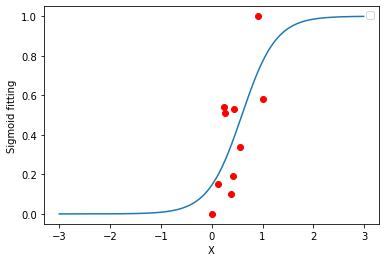

In [117]:
y = np.arange(0,1,0.01)
x = np.arange(-3,3,0.01)
fn = []
for i in range(len(x)):
    fn.append(1/(1+np.exp(-(w_lsgd*x[i]+b_lsgd))))
plt.plot(X,Y,'ro')
plt.plot(x,fn)
plt.ylabel("Sigmoid fitting")
plt.xlabel("X") 
leg = plt.legend()

Text(0.5, 0, 'epochs')

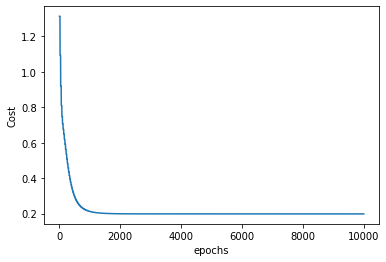

In [118]:
plt.plot(err_msgd)
plt.ylabel("Cost") 
plt.xlabel("epochs") 

# Adaptive Gradient Descent 

In [9]:
def adagrad():
    w,b,eta,max_epochs = -2,2,0.1,1000
    v_w,v_b,eps = 0,0,1e-8
    err = []
    for i in range(max_epochs):
        dw,db = 0,0
        for x,y in zip(X,Y):
            dw += grad_w(w,b,x,y)
            db += grad_b(w,b,x,y)
        v_w = v_w + dw**2
        v_b = v_b + db**2
        w = w - (eta/np.sqrt(v_w+eps))*dw
        b = b - (eta/np.sqrt(v_b+eps))*db
        err.append(error(w,b))
    return w,b,err

In [10]:
w_agd,b_agd,err_agd = adagrad()

No handles with labels found to put in legend.


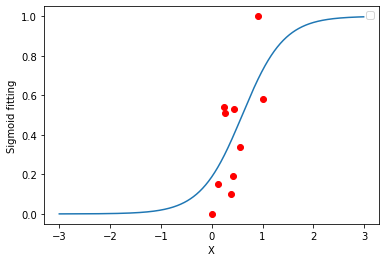

In [11]:
y = np.arange(0,1,0.01)
x = np.arange(-3,3,0.01)
fn = []
for i in range(len(x)):
    fn.append(1/(1+np.exp(-(w_agd*x[i]+b_agd))))
plt.plot(X,Y,'ro')
plt.plot(x,fn)
plt.ylabel("Sigmoid fitting")
plt.xlabel("X") 
leg = plt.legend()

Text(0.5, 0, 'epochs')

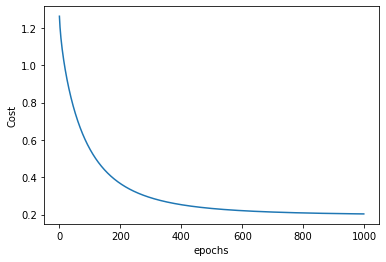

In [12]:
plt.plot(err_agd)
plt.ylabel("Cost") 
plt.xlabel("epochs") 

In [14]:
def rmsprop():
    w,b,eta,max_epochs = -2,2,0.1,1000
    v_w,v_b,eps,beta1 = 0,0,1e-8,0.9
    err = []
    for i in range(max_epochs):
        dw,db = 0,0
        for x,y in zip(X,Y):
            dw += grad_w(w,b,x,y)
            db += grad_b(w,b,x,y)
        v_w = beta1*v_w + (1-beta1)*dw**2
        v_b = beta1*v_b + (1-beta1)*db**2
        w = w - (eta/np.sqrt(v_w+eps))*dw
        b = b - (eta/np.sqrt(v_b+eps))*db
        err.append(error(w,b))
    return w,b,err

In [15]:
w_rms,b_rms,err_rms = rmsprop()

No handles with labels found to put in legend.


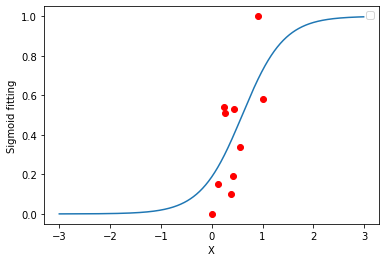

In [16]:
y = np.arange(0,1,0.01)
x = np.arange(-3,3,0.01)
fn = []
for i in range(len(x)):
    fn.append(1/(1+np.exp(-(w_rms*x[i]+b_rms))))
plt.plot(X,Y,'ro')
plt.plot(x,fn)
plt.ylabel("Sigmoid fitting")
plt.xlabel("X") 
leg = plt.legend()

Text(0.5, 0, 'epochs')

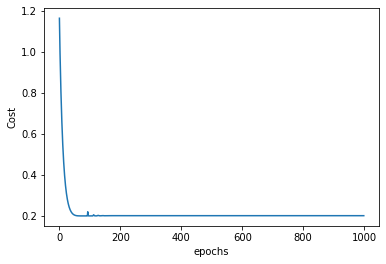

In [17]:
plt.plot(err_rms)
plt.ylabel("Cost") 
plt.xlabel("epochs") 